# Q-learning using tables
##### Authors: Eirik Fagtun Kjærnli and Fabian Dietrichson

## Welcome 
This workshop is structured such that for each cell you will write your code own code, and the code will be asserted in the next cell. The code should be written between "Write code below" and "Write code above". If your code do not pass the assertion, you will have to rewrite your code.

### Task:
Click on the cell below, and run it to import the necessary libaries
Hot key to run a cell: ctrl + enter

In [242]:
def multiply_input_by_2(a_variabel):

    "Write code below" 
    result = a_variabel * 2
    
    "Write code above" 
    
    return result

In [243]:
assert(multiply_input_by_2(10) == 20), "Your method did not multiple the input by 2"
print("Great, you correctly implemented the method!")

Great, you correctly implemented the method!


## Import of neccesary packages
To implement the Q-learning and use it in a environment we just need two packages.

_Numpy_
- Numpy adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. We do the workshop using native Python arrays, however using Numpy simplifies the process.

_OpenAI Gym_
- The Gym library is a collection of test problems — environments — that you can use to work out your reinforcement learning algorithms. This range from simple text problems, to complex physisical problems, to Atari video games, which have made it the prefeered framework to learn and test Reinforcement learning algorithms.


### Task:
Click on the cell below and run it, this import the necessary packages. 

In [244]:
import numpy as np
import gym

In [245]:
try:
    assert(gym)
    print("Great, the packages were imported correctly!")
except:
    print("You did not run the cell above, do this before you continue!")

Great, the packages were imported correctly!


## Introduce the game we are going to solve here

Blabla this is how the game works

### Task:
Create the environment variabel containing all necessary methods to run the Taxi-v2 game. <br>
_Tip: Just run the cell below_

In [246]:
environment_id = "Taxi-v2"
env = gym.make(environment_id)

In [247]:
# Do not edit #
try:
    assert(env)
    print("You successfully created the environement {}".format(env.spec.id))
except:
    print("You create the environment incorrectly!")

You successfully created the environement Taxi-v2


## Run support methods for workshop
Before you can go on, the cell below must be run. These are methods used to verify your work, in additon to support function. 

### Task
Do as you have done before, simply mark the cell below and press CTRL + Enter!

In [248]:
from IPython.display import clear_output
import gym
import time
from copy import deepcopy
import seaborn as sb
import matplotlib.pyplot as plt

class TestEnvironment():
    
    def __init__(self):
        self.env = gym.make(environment_id)
        self.env.reset()
        
    def play(self, action):
        if not (0 <= int(action) <= 5):
            print("Action value must either be 0,1,2,3,4 or 5")
            return

        clear_output()
        _, reward, done, _ = self.env.step(action)
        self.env.render()
        print("Reward: ", reward)
        
        if(done):
            print("Game completed, resetting environment!")
            self.reset_env()
        
    def reset_env(self):
        self.env.reset()
        print("Environment has been reset")
        time.sleep(2)
        clear_output()
        

test_env = TestEnvironment()

class MockData():
    def __init__(self):
        self.env = gym.make(environment_id)
        self.env.seed(10)
        
    def get_Q(self):
        Q = np.zeros([self.env.observation_space.n, self.env.action_space.n])
        Q[0:2,0] = 10
        return Q
    
    def get_env(self):
        return self.env

mock = MockData()
def visualize_q_table():
    fig=plt.figure(figsize=(10, 10))
    heat_map = sb.heatmap(Q_trained)
    plt.show()

def plot_visualization(data):
    
    reward_list = data[0]
    iteration_list = data[1]
    epsilon_list = data[2]
    
    episodes = range(len(reward_list))
    
    plt.figure(figsize=(10,10))
    ax = plt.subplot(311)
    ax.set_title("Reward")
    ax = plt.plot(episodes, reward_list)

    ax = plt.subplot(312)
    ax.set_title("Iterations per episode")
    ax.plot(episodes, iteration_list)
    
    ax = plt.subplot(313)
    ax.set_title("Epsilon")
    ax.set_xlabel("Episodes")
    ax.plot(episodes, epsilon_list)
    
    plt.show()

def reset_env_and_update_params(env):
    done = False
    state = env.reset()
    iterations = 0
    total_reward = 0
    
    return state, done, iterations, total_reward

def render_performance(env, Q):
    iterations = 0
    total_reward = 0
    t_sleep = 1.2
    
    state = env.reset()
    env.render()
    time.sleep(t_sleep)
    clear_output()
    done = False

    while not done:
        action = np.argmax(Q[state,:]) 

        new_state, reward, done, _ = env.step(action)
        state =  new_state

        env.render()
        time.sleep(t_sleep)
        clear_output()
        
        iterations += 1
        total_reward += reward
        
        if (iterations >= 20): 
            done = True
            print("Agent did not complete the episode within 20 iterations, train your agent better!")
    
    print("Your agent completed the task using {} iterations, \
          and got a total reward of {}".format(iterations, total_reward))

In [249]:
# Do not edit #
try:
    assert(mock)
    print("Great, the support methods were created!")
except:
    print("You did not run the cell above, do this before you continue!")

Great, the support methods were created!


## Experiment with environment
Before we start creating the Q-learning agent, we will explore the environment we are going to use. This is done using a support method we have created for you.

**How to play**
1. Simply input an action where it is indicated in the cell below, and click CTRL + Enter. 
2. The game will reset when you have dropped of the passenger at the indicated location.
3. If you would like to reset the environment, run the cell which indicates this below  

*Tip*: The bold colored letter shows where the passenger should be picked up, and the normal colored letter shows drop of spot.

**Possible actions**
0. Move down
1. Move up
2. Move right
3. Move left
4. Pick up passenger
5. Drop off passenger

### Task:
Play around with the environment to understand the rewards and how the game dynamics works. When you will confident, move on to the next cell.

In [250]:
# Run this to recent environment
test_env.reset_env()

In [251]:
# Input your action below
action = 1
# Input your action above

test_env.play(action)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Reward:  -1


## Discussion point
The game above is a simply environment, which is easy for humans to solve. However, if you were to use traditional programming, how would you solve it? 

### Task
Use 5 minutes in the group to come up with a strategy, and create a quick draft!

<img src="images/Discussion.jpg" alt="drawing" width="400" height="200"/>

# Q-learning

Q-learning is one the most iconic Reinforcement learning algorihms, and can be used to solve a great variaty of challenges.

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow Q(s_{t}, a_{t}) + \alpha \ \big[r_{t} + \gamma \ \underset{a}{max} \  Q(s_{t+1},a) - Q(s_{t},a_{t})\big]
\end{equation}
$

## Create a Q-table
 In its most simplistic form it uses a table to store its values. This is the 

Each row in the array is a state <br>
Each column is an action

The Q-table will be similar to the one below, although without the labels on the columns. 

<img src="images/Taxi_matrix_initial.png" alt="drawing" width="500" height="500"/>

### Task:
Create and return a Q-table, where each cell is initialized to zeros, with:
- The number of columns equal to number of actions in the environment (Use env.action_space.n)
- The number of rows equal to number of states in the environment (Use env.observation_space.n)

In [252]:
def create_q_table(env):
    
    "Write code below" 
    action_size = env.action_space.n
    observation_size = env.observation_space.n
    
    Q_table = np.zeros([env.observation_space.n, env.action_space.n])
    
    "Write code above" 
    
    return Q_table

In [253]:
# Do not edit #
assert(np.count_nonzero(mock.get_Q() == 0)), "All values in Q-table should be zero"
assert(mock.get_Q().shape == (mock.get_env().observation_space.n, mock.get_env().action_space.n)), \
"The dimensions are wrong"
print("The Q-table was correctly built! " +
      "It has {} rows, each representing a unique state, and {} columns, each representing an action for that state."\
      .format(mock.get_env().observation_space.n, mock.get_env().action_space.n))

The Q-table was correctly built! It has 500 rows, each representing a unique state, and 6 columns, each representing an action for that state.


## Select the best action
This method will  picked pick out the best action given the state


### Task
Pick the action with the highest Q-value given state

In [254]:
def get_best_action(Q, state):
    
    "Write code below" 
    best_action =  np.argmax(Q[state,:]) 
    
    "Write code above"
    
    return best_action

In [255]:
# Do not edit #
assert(get_best_action(mock.get_Q(), 1) == 0), "The method did not pick the action with the highest Q_value"
print("The best action for the test state was chosen, excellent!")

The best action for the test state was chosen, excellent!


### Select an action
The exploration vs. exploitation is a very effective method to ensure the agent explores a sufficent area of the state space, and avoid coverging to a local optima.

#### Task:
Compute the action to take in the current state, including exploration.  
If the probability, e.g. epsilon, is higher than a random number, we should take a random action
    otherwise - the best policy action (self.getPolicy).

*Tip* 
- To pick a random action, use env.action_space.sample()
- To generate a random number with uniform probability, use np.random.uniform()

In [256]:
def select_action(Q, state, epsilon):
    
    "Write code below"
    if epsilon > np.random.uniform():
        action = env.action_space.sample()
    else:
        action = get_best_action(Q, state)
    
    "Write code above"    
    
    return action

In [257]:
# Do not edit #
assert(select_action(mock.get_Q(), 1, 0) == 0), \
"Method should always return the same value for this state, since epsilon is 0"
assert not (len(set([select_action(mock.get_Q(), 1, 1) for x in range(20)])) <= 2), \
"Method should not return identical values when a random action, should be chosen"
print("The correct actions were picked, great job!")

The correct actions were picked, great job!


## Gradually shift towards exploitation, and reduce exploration of state space
To make sure we are gradually moving from exploring the environment by taking random actions, we need to reduce the possibility of choosing a random action. In other words, we need to reduce Epsilon. 

### Task:
Create a method which reduces epsilon by a factor called epsilon decay

In [258]:
def update_epsilon(epsilon):
    epsilon_decay = 0.95
    
    "Write code below" 
    epsilon *= epsilon_decay
    "Write code above"
    
    return epsilon

In [259]:
# Do not edit #
assert(update_epsilon(5) == 4.75), "Given an input of 5, the output should have been 4.75"
print("Epsilon was correctly updated!")

Epsilon was correctly updated!


 ## Find the highest Q_value for a given state

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow Q(s_{t}, a_{t}) + \alpha \ \big[r_{t} + \gamma \ {\color{red}{\underset{a}{max} \  Q(s_{t+1},a)}} - Q(s_{t},a_{t})\big]
\end{equation}
$ 

### Task

In [260]:
def find_highest_Q_value_in_state(Q, new_state):
    "Write code below"
    best_Q_value = np.max(Q[new_state,:])
    "Write code above"
    
    return best_Q_value

In [261]:
# Do not edit #
assert(find_highest_Q_value_in_state(mock.get_Q(), 1) == 10), \
"The method did not pick the action with the highest Q_value"
print("Perfect, the method returned the highest Q-value for that state!")

Perfect, the method returned the highest Q-value for that state!


## Calculate error  in Q-value

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow Q(s_{t}, a_{t}) + \alpha \ \big[{\color{red}{r_{t} + \gamma \ \underset{a}{max} \  Q(s_{t+1},a) - Q(s_{t},a_{t})}}\big]
\end{equation}
$

Need to explain the discount factor

### Task:


In [262]:
def calculate_error_in_Q_value(Q, state, action, reward, new_state):
    
    discount_factor = 0.95
    
    "Write code below"
    highest_q_value_in_state = find_highest_Q_value_in_state(Q, new_state)
    
    error_in_Q_value = reward + discount_factor * highest_q_value_in_state - Q[state,action]
    
    "Write code above"
    
    return error_in_Q_value

In [263]:
# Do not edit #
assert(calculate_error_in_Q_value(mock.get_Q(), 0, 0, 10, 1) == 9.5), \
"The method did not calculate the correct error value for the test sample"
print("The error in Q-value have been calculated correctly!")

The error in Q-value have been calculated correctly!


## Update Q-table

Finaly we can put it all together and end up with the final equation.

$
\begin{equation}
Q(s_{t},a_{t})^{new} \leftarrow {\color{red}{Q(s_{t}, a_{t}) + \alpha \ \big[r_{t} + \gamma \ \underset{a}{max} \  Q(s_{t+1},a) - Q(s_{t},a_{t})\big]}}
\end{equation}
$

### Task
Create a method which either sets
 - The Q-value equal to the reward, if it was the final episode. (Done is true)
 - Else updates the Q by following the equation above

In [264]:
def update_q_table(Q, state, action, done, reward, new_state):
    
    learning_rate = 0.8
    
    "Write code below"
    if(done):
        Q[state, action] = reward
    else:
        Q[state, action] = Q[state, action] + \
        learning_rate * calculate_error_in_Q_value(Q, state, action, reward, new_state)
    "Write code above"
    
    return Q

In [265]:
# Do not edit #
assert(update_q_table(mock.get_Q(), 2, 1, 1, 10, 3)[2,1] == 10), \
"The updated Q-value when simulation was done was incorrect"
assert(update_q_table(mock.get_Q(), 0, 0, 0, 10, 1)[0,0] == 17.6), \
"The updated Q-value when the episode was not done, was incorrect"
print("Q-tabel have been correctly updated!")

Q-tabel have been correctly updated!


## Take one step
Take all we have learnt until this point

### Task
    Chose action
    Make step
    Return result
    

In [266]:
def step(Q, env, state, epsilon):
    
    "Write code below"
    action = select_action(Q, state, epsilon)
    new_state, reward, done, _ = env.step(action)
    
    "Write code above"
    
    return action, reward, done, new_state

In [267]:
# Do not edit #
mock_env1 = deepcopy(mock.get_env())
mock_env1.reset()
mock_env2 = deepcopy(mock_env1)

new_state, _, _, _ = mock_env1.step(0)
assert(step(mock.get_Q(), mock_env2, 0, 0) == (0, -1, False, new_state)), \
"Your environment did not return the correct values"
print("Your step method seems to function properly, good job!")

Your step method seems to function properly, good job!


## Create train method

Explain what an episode and iteration is
Explain code already writen

### Task

In [268]:
def train(env, num_episodes, epsilon = 1):
    done = False
    reward_list, iterations_list, epsilon_list = [], [], []
    
    "Write code below"
    # Initialize Q-table
    Q = create_q_table(env)
    "Write code above"

    for episode in range(num_episodes):

        if (done and episode % 10 == 0): 
            print("Episode: {} | Iterations: {} | Total Reward: {}".format(episode, iterations, total_reward))
        
        state, done, iterations, total_reward = reset_env_and_update_params(env)
        
        "Write code below"
        # Update epsilon
        epsilon = update_epsilon(epsilon)
        
        "Write code above"
        
        while not done:
            
            "Write code below"
            
            # Take step
            action, reward, done, new_state = step(Q, env, state, epsilon)
                        
            # Update Q-table
            Q = update_q_table(Q, state, action, done, reward, new_state)
            
            # Set the new state as the current state
            state = new_state
            
            "Write code above"
            
            # Update episode information
            iterations += 1
            total_reward += reward
            
            # End episode if it has lasted for too many iterations
            if (iterations >= 40): done = True

        reward_list.append(total_reward)
        iterations_list.append(iterations)
        epsilon_list.append(epsilon)
        
    return Q, epsilon, (reward_list, iterations_list, epsilon_list)

## Create play method


### Task

In [269]:
def play(env, Q):
    
    state, done, iterations, total_reward = reset_env_and_update_params(env)

    while not done:

        "Write code below"
        # Take step
        action, reward, done, new_state = step(Q, env, state, 0)

        # Set the new state as the current state
        state = new_state

        "Write code above"

        # Update episode information
        iterations += 1
        total_reward += reward

        if (iterations >= 50): done = True
    
    print("Iterations: {} | Total Reward: {}".format(iterations, total_reward))

## Time to put our methods to use!

### Train agent

In [270]:
Q_trained, _, data = train(env, 1000)

Episode: 10 | Iterations: 40 | Total Reward: -166
Episode: 20 | Iterations: 40 | Total Reward: -121
Episode: 30 | Iterations: 40 | Total Reward: -112
Episode: 40 | Iterations: 40 | Total Reward: -103
Episode: 50 | Iterations: 40 | Total Reward: -166
Episode: 60 | Iterations: 40 | Total Reward: -139
Episode: 70 | Iterations: 40 | Total Reward: -76
Episode: 80 | Iterations: 40 | Total Reward: -58
Episode: 90 | Iterations: 40 | Total Reward: -40
Episode: 100 | Iterations: 40 | Total Reward: -40
Episode: 110 | Iterations: 40 | Total Reward: -40
Episode: 120 | Iterations: 40 | Total Reward: -40
Episode: 130 | Iterations: 40 | Total Reward: -40
Episode: 140 | Iterations: 40 | Total Reward: -130
Episode: 150 | Iterations: 40 | Total Reward: -40
Episode: 160 | Iterations: 28 | Total Reward: -34
Episode: 170 | Iterations: 40 | Total Reward: -40
Episode: 180 | Iterations: 40 | Total Reward: -85
Episode: 190 | Iterations: 40 | Total Reward: -40
Episode: 200 | Iterations: 40 | Total Reward: -58
Ep

### Plot key variables 

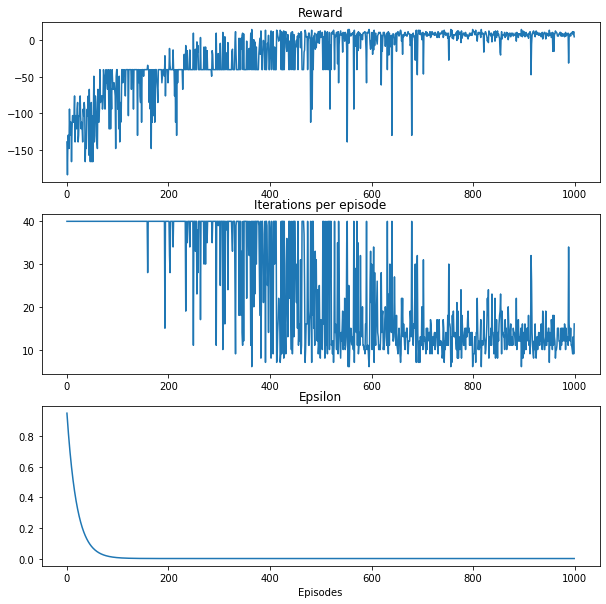

In [271]:
plot_visualization(data)

### Play a round

In [272]:
play(env, Q_trained)

Iterations: 17 | Total Reward: 4


### Visualize an episode

In [273]:
render_performance(env, Q_trained)

Agent did not complete the episode within 20 iterations, train your agent better!
Your agent completed the task using 20 iterations,           and got a total reward of -20
